# MI-ADM: first home assignment

  * **Deadline**: 19/03/2018, -2 points for a late submission, hard deadline is the first day of the exam period.
  * **What to submit**: Just this notebook with you code and texts, not the dataset! Please run "Kernel>Restart & Clear Output" before submitting.
  * **How to submit**: Preferred way is to start a repository (for both home assignments) on https://gitlab.fit.cvut.cz and add me as a reporter (my username is kloudkar), however, you can send this jupyter notebook by email (*do not send the dataset!!*).

Generally speaking, the goal of this assignment is to use kNN algorithm to get the best possible result (in terms of classification accuracy) when applied on the MNIST dataset.

What you HAVE TO do:
  * Apply the kNN algorithm as implemented in sklearn to the MNIST dataset.
  * Come up with at least one new reasonable feature (extracting features ...).
  * Select at least two parameters of the model and tune them using [cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html).
  * Write down a (one paragraph long) conclusion into the very last cell of this notebook.

If you do all this properly you will be given 4 points out of possible 6.

To get more do some extra work to (try to) improve the result, here are some suggestions:
  * Try to extract more features, read some papers or blogs to get an inspiration (google something like "image data feature extraction").
  * Try to tune more parameters of the model.
  * Try to use the decision tree algorithm (it is a topic of our next tutorial class) and compare the results.
  * Try to run PCA to lower the number of features.
  * Sigh in at kaggle.com and apply your resulting model to the test dataset in [the MNIST competition](https://www.kaggle.com/c/digit-recognizer).

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
import seaborn as sns

%matplotlib inline

data = pd.read_csv('train.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

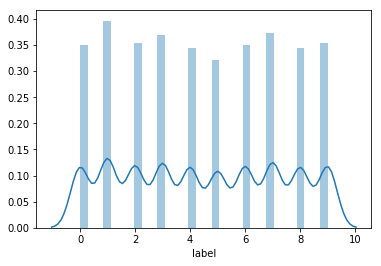

In [2]:
sns.distplot(data['label'])
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


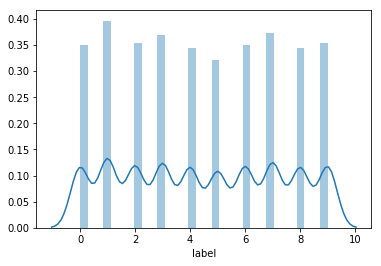

In [3]:
#data = data.sample(n=10000, random_state=326)
sns.distplot(data['label'])
data.info()

## Otestování původních dat

In [4]:
def test_split(dtrain, dtest, k = 3):
    X = dtrain.drop(['label'], axis = 1, errors = 'ignore')
    y = dtrain.label
    Xtest = dtest.drop(['label'], axis = 1, errors = 'ignore')
    ytest = dtest.label
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'brute', p = 2)
    knn.fit(X,y)
    prediction = knn.predict(Xtest)
    res = pd.DataFrame(np.matrix([prediction, ytest, prediction - ytest]).T)
    res.columns = ['predict', 'real', 'diff']
    print('number of well predicted = {0} out of {1} ({2:.4f} %)'.
      format(res[res['diff'] == 0].shape[0], ytest.shape[0], 100*res[res['diff'] == 0].shape[0]/ytest.shape[0]))
    difference = res[res['diff'] != 0]['real']
    sns.distplot(difference)
    

def test(data, k = 3):
    dtrain, dtest = train_test_split(data, test_size=0.25, random_state=129)
    test_split(dtrain, dtest, k)

number of well predicted = 10164 out of 10500 (96.8000 %)


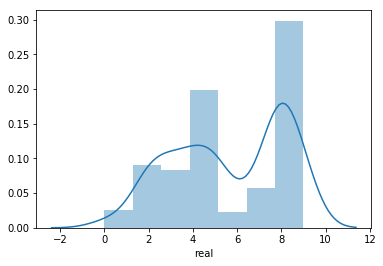

In [5]:
test(data)

# Výběr příznaků
## Odstranění pixelů,  které mají vždy stejnou hodnotu
Neřeším drobné nuance - pokud nikdy pixel nemá hodnotu větší, než 100, je odstraněn. Tím se zrychlí výpočet následující části

In [6]:
zero_treshold = 100
selected_columns = data.columns[data.max() > zero_treshold].tolist()
selected_columns.append('label')
data = data[selected_columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 681 entries, pixel12 to label
dtypes: int64(681)
memory usage: 218.2 MB


number of well predicted = 10164 out of 10500 (96.8000 %)


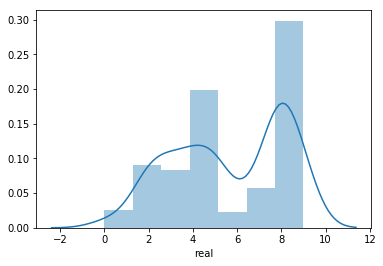

In [7]:
test(data)

## Odstranění pixelů, které nepřinášejí mnoho informace

In [8]:
# to speed up we select only a small subset of data
dsmall, garbage = train_test_split(data, test_size=0.75, random_state=555)
Xsm = dsmall.drop(['label'], axis = 1, errors = 'ignore')
ysm = dsmall.label
fs = SelectKBest(mutual_info_classif, k=350)
fs.fit_transform(Xsm, ysm)
selected_columns = data.loc[:,fs.get_support()].columns.tolist()
selected_columns.append('label')
data = data[selected_columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 351 entries, pixel96 to label
dtypes: int64(351)
memory usage: 112.5 MB


number of well predicted = 10163 out of 10500 (96.7905 %)


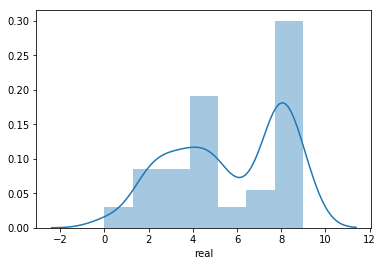

In [9]:
test(data)

## Pokus o výběr pouze některých samostatných příznaků
Zkoušel jsem, jestli samotné některé pixely nenesou dostatek informace - ale asi ne.

In [10]:
def corr(data):
    # Correlation matrix Pearson Spearman
    corrP = data.corr(method='pearson')
    corrS = data.corr(method='spearman')

    corrP_cols = corrP.label.abs().nlargest(10).index
    corrS_cols = corrS.label.abs().nlargest(10).index
    fig, axs = plt.subplots(ncols=2, figsize=(15,7))
    sns.heatmap(corrP.abs().loc[corrP_cols,corrP_cols],ax=axs[0], cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=corrP_cols.values, xticklabels=corrP_cols.values)
    sns.heatmap(corrS.abs().loc[corrS_cols,corrS_cols],ax=axs[1], cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=corrS_cols.values, xticklabels=corrS_cols.values)

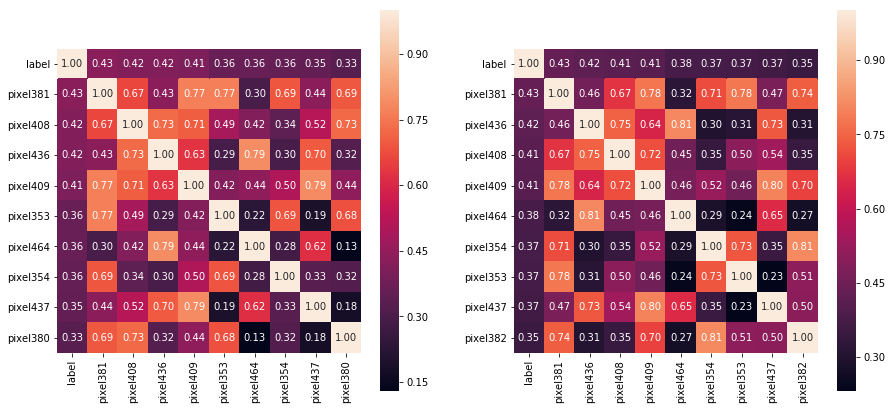

In [11]:
data2 = data.sample(frac=0.1) # Jinak bych to neupočítal
corr(data2)

number of well predicted = 1029 out of 10500 (9.8000 %)
number of well predicted = 1093 out of 10500 (10.4095 %)
number of well predicted = 2026 out of 10500 (19.2952 %)
number of well predicted = 1643 out of 10500 (15.6476 %)
number of well predicted = 3168 out of 10500 (30.1714 %)


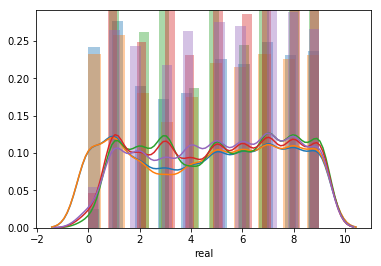

In [12]:
selected_columns = ['pixel409', 'pixel381', 'pixel436', 'pixel464']
for column in selected_columns:
    data_select = data[['label', column]]
    test(data_select)
    

data_select = data[['label', 'pixel409', 'pixel381', 'pixel436', 'pixel464']]
test(data_select)

## PCA

2
number of well predicted = 4257 out of 10500 (40.5429 %)
5
number of well predicted = 7566 out of 10500 (72.0571 %)
10
number of well predicted = 9722 out of 10500 (92.5905 %)
15
number of well predicted = 9998 out of 10500 (95.2190 %)
20
number of well predicted = 10150 out of 10500 (96.6667 %)
50
number of well predicted = 10214 out of 10500 (97.2762 %)
100
number of well predicted = 10194 out of 10500 (97.0857 %)
150
number of well predicted = 10188 out of 10500 (97.0286 %)
200
number of well predicted = 10178 out of 10500 (96.9333 %)
300
number of well predicted = 10168 out of 10500 (96.8381 %)


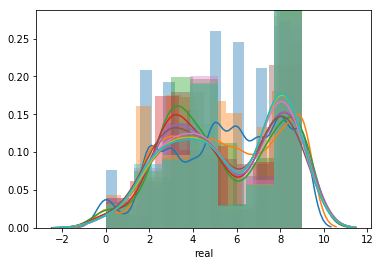

In [13]:
for i in [2, 5, 10, 15, 20, 50, 100, 150, 200, 300]:
    print(i)
    pca = PCA(i)
    dtrain, dtest = train_test_split(data, test_size=0.5, random_state=129)
    pca.fit_transform(dtrain)
    data_transformed = pca.transform(data)
    column_indexes = []
    for j in range(0, len(data_transformed[0])):
        column_indexes.append('PCA-' + str(j))
    data_transformed = pd.DataFrame(data=data_transformed, index=data.index, columns=column_indexes)
    data_transformed['label'] = data['label']
    test(data_transformed)

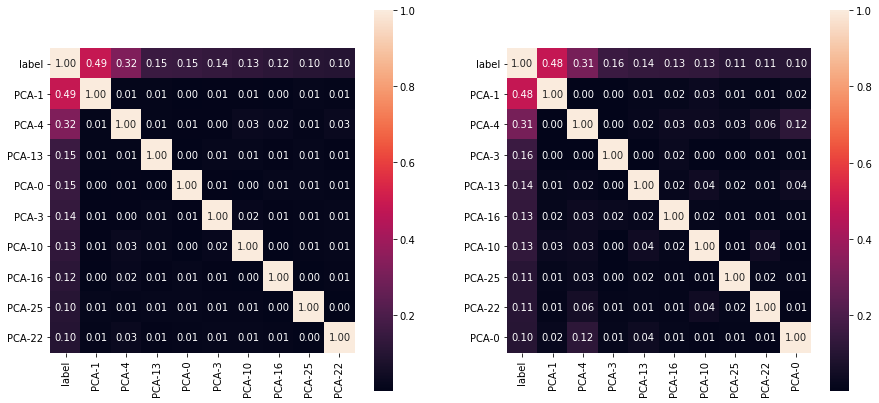

In [14]:
data_transformed2 = data_transformed.sample(frac=0.1)
corr(data_transformed2)

# Upravené příznaky
## Příznak průměr

In [15]:
def average_px(data):
    data['sum'] = 0
    for column in data.columns.difference(['label']):
        data['sum'] += data[column]
    data['sum'] /= (data.columns.size - 1)
    
data_e = data.copy()
average_px(data_e)

number of well predicted = 10163 out of 10500 (96.7905 %)


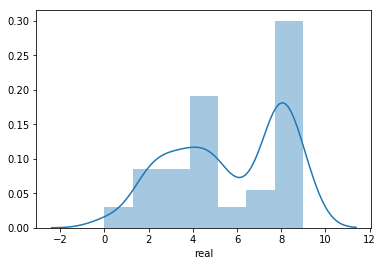

In [16]:
test(data_e)

 ## Průměrná vzdálenost od středu

In [17]:
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import chebyshev
from scipy.spatial.distance import cityblock
import math

pixel_columns = data.columns.difference(['label'])
def add_distance(data, distance = euclidean, threshold=2):
    data['distance'] = 0
    x_center = 14
    y_center = 14
    for column in pixel_columns:
        col_num = int(column[5:])
        x = col_num % 28
        y = math.floor(col_num / 28)
        dist = distance([x, y], [x_center, y_center])
        data['distance'] += data[column] * dist
    data['distance'] /= pixel_columns.size

Čebyšev
number of well predicted = 10162 out of 10500 (96.7810 %)
Euclidean
number of well predicted = 10161 out of 10500 (96.7714 %)
Manhattan
number of well predicted = 10164 out of 10500 (96.8000 %)


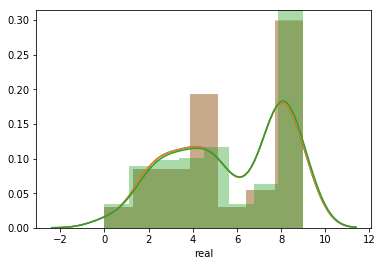

In [18]:
print('Čebyšev')
data_e = data.copy()        
add_distance(data_e, distance = chebyshev)
test(data_e)
print('Euclidean')
data_e = data.copy()  
add_distance(data_e, distance = euclidean)
test(data_e)
print('Manhattan')
data_e = data.copy()  
add_distance(data_e, distance = cityblock)
test(data_e)

## Příznak zastoupení jednotlivých barev
Následující graf ukazuje zastoupení jednotlivých barev náhodně vybraného pixelu

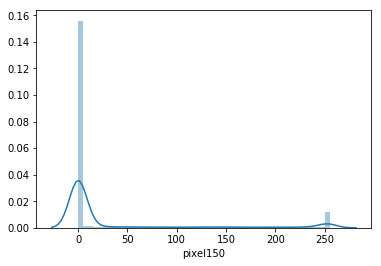

In [19]:
sns.distplot(data['pixel150'])

In [20]:
data2 = data.copy()
def avg_colors(data):
    pixel_columns = data.columns.difference(['label'])
    step = 64
    for color in range(0, 256, step):
        color_column = 'color_' + str(color)
        data[color_column] = 0
        for pixel in pixel_columns:
            data[color_column] += (data[pixel] >= color) & (data[pixel] < color + step)
        data[color_column] *= 10
avg_colors(data2)

number of well predicted = 10168 out of 10500 (96.8381 %)


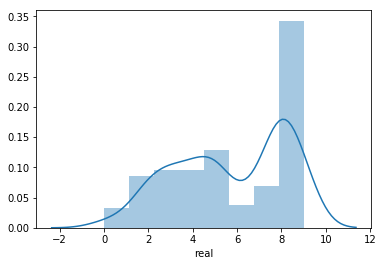

In [21]:
test(data2)

## Počet pixelů ve směru

In [22]:
def length_row(data, row):
    max_dist = 0
    first = 28
    last = 0
    for col in range(0, 28):
        pixel_index = 'pixel' + str(row * 28 + col)
        value = 0
        if pixel_index in data:
            value = data[pixel_index]
        if(value > 5):
            last = col
            if(first > col):
                first = col
    if last - first > max_dist:
        max_dist = last - first
    return max_dist

def compute_lengths(data):
    for i in range(5, 20, 2):
        data['row_len_' + str(i)] = length_row(data, i)

def direction_pixel_num(data):
    for i in range(5, 20, 2):
        data['row_len_' + str(i)] = 0
    for row_index, data_row in data.iterrows():
        compute_lengths(data_row)
        
data2 = data.copy()
direction_pixel_num(data2)

number of well predicted = 10163 out of 10500 (96.7905 %)


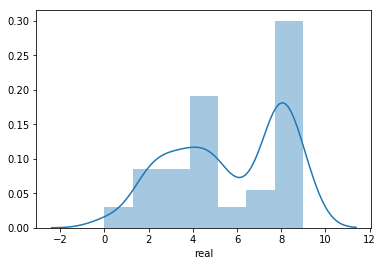

In [23]:
test(data2)

# Nalezení správných parametrů modelu
## Počet nejbližších sousedů

In [24]:
from sklearn.model_selection import cross_val_score
dtrain, dtest = train_test_split(data, test_size=0.75, random_state=129)

In [25]:
for k in range(1, 15):
    print(k)
    p = 2
    knn = KNeighborsClassifier(n_neighbors = k, algorithm = 'brute', p = p)
    data_values = dtrain.drop(['label'], axis = 1, errors = 'ignore')
    scores = cross_val_score(knn, data_values, dtrain['label'], cv=5)
    accuracy = scores.mean()
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

1
Accuracy: 0.9476 (+/- 0.0033)
2
Accuracy: 0.9355 (+/- 0.0047)
3
Accuracy: 0.9456 (+/- 0.0046)
4
Accuracy: 0.9437 (+/- 0.0019)
5
Accuracy: 0.9458 (+/- 0.0065)
6
Accuracy: 0.9421 (+/- 0.0044)
7
Accuracy: 0.9423 (+/- 0.0065)
8
Accuracy: 0.9405 (+/- 0.0080)
9
Accuracy: 0.9400 (+/- 0.0093)
10
Accuracy: 0.9392 (+/- 0.0109)
11
Accuracy: 0.9371 (+/- 0.0093)
12
Accuracy: 0.9374 (+/- 0.0122)
13
Accuracy: 0.9358 (+/- 0.0104)
14
Accuracy: 0.9340 (+/- 0.0091)


number of well predicted = 10159 out of 10500 (96.7524 %)


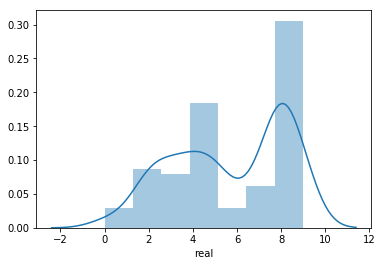

In [26]:
test(data, 5)

## Použitá metrika
Původně jsem chtěl otestovat všechno možné, ale výpočet čehokoli jiného, než klasické Minkowského vzdálenosti trval dost dlouho. Na omezených datech se navíc ukázalo, že zlepšení není nijak výrazné (můj počítač by to nedal a učení na omezených datech by nemělo smysl).

In [27]:
for p in [1, 2]:
    print(p)
    k = 1
    knn = KNeighborsClassifier(n_neighbors = k, p = p)
    data_values = dtrain.drop(['label'], axis = 1, errors = 'ignore')
    scores = cross_val_score(knn, data_values, dtrain['label'], cv=5)
    accuracy = scores.mean()
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

1
Accuracy: 0.9379 (+/- 0.0034)
2
Accuracy: 0.9476 (+/- 0.0033)


In [28]:
from scipy.spatial.distance import canberra
from scipy.spatial.distance import cosine
from scipy.spatial.distance import correlation
from scipy.spatial.distance import chebyshev
from scipy.spatial.distance import euclidean

dtrain = dtrain.sample(500)

for metric in [euclidean, chebyshev, cosine, correlation, canberra]:
    print(metric)
    k = 1
    knn = KNeighborsClassifier(n_neighbors = k, metric = metric)
    data_values = dtrain.drop(['label'], axis = 1, errors = 'ignore')
    scores = cross_val_score(knn, data_values, dtrain['label'], cv=5)
    accuracy = scores.mean()
    print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

<function euclidean at 0x7fd6170c3620>
Accuracy: 0.8277 (+/- 0.0322)
<function chebyshev at 0x7fd6170c3b70>
Accuracy: 0.4483 (+/- 0.0459)
<function cosine at 0x7fd6170c37b8>
Accuracy: 0.8514 (+/- 0.0876)
<function correlation at 0x7fd6170c3730>
Accuracy: 0.8555 (+/- 0.0741)
<function canberra at 0x7fd6170c3c80>
Accuracy: 0.8199 (+/- 0.0452)


# Kombinace nově přidaných příznaků

In [29]:
data2 = data.copy()
average_px(data2)
data3 = data.copy()
add_distance(data3, distance = euclidean)
data4 = data.copy()
direction_pixel_num(data4)
data5 = data.copy()
avg_colors(data5)

In [30]:
data['sum'] = data2['sum']
data['distance'] = data3['distance']
for i in range(5, 20, 2):
    data['row_len_' + str(i)] = data4['row_len_' + str(i)]
for color in range(0, 256, 64):
    color_column = 'color_' + str(color)
    data[color_column] = data5[color_column]

In [31]:
for i in range(5, 20, 2):
    data['row_len_' + str(i)] = data4['row_len_' + str(i)]

number of well predicted = 10161 out of 10500 (96.7714 %)


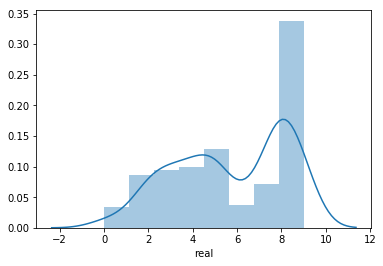

In [32]:
test(data)

# Závěr
K-nn dokáže dobře klasifikovat dataset MNIST již na původních datech. Přidání nových příznaků nebo ostranění neužitečních pixelů mělo na úspěšnost minimální vliv (pozitivní nebo negativní v závislosti na výběru testovacích dat). Jedinou úspěšnou technikou se ukázalo být PCA. Nejlepším počtem sousedů k porovnání byl 1 (čekal bych, že tomu bude při takovémto počtu vzorků jinak). Změna metriky vzdálenosti mezi příznaky může pomoci zlepšit klasifikaci -- použití korelace místo klasické Eukleidovské vzdálenosti by pravděpodobně bylo dobrým řešením, avšak výpočet celého datasetu s touto metrikou (na mně dostupných počítačích) trval nepřiměřeně dlouho.